In [1]:
from tensorboard.backend.event_processing import event_accumulator
from google import protobuf
import matplotlib.pyplot as plt

In [2]:
ea_untrained = event_accumulator.EventAccumulator('damped-harmonic-oscillator-flow-training-with-untrained-sim-neurips/events.out.tfevents.1694718785.submit20.mit.edu.2612112.1')
ea_trained = event_accumulator.EventAccumulator('damped-harmonic-oscillator-flow-training-neurips/events.out.tfevents.1694743913.submit22.mit.edu.41210.5')
ea_baseline = event_accumulator.EventAccumulator('damped-harmonic-oscillator-baseline.neurips/events.out.tfevents.1694728331.submit20.mit.edu.2612107.1')

ea_baseline_30 = event_accumulator.EventAccumulator(
    './sho-baseline.hidden.30.neurips/events.out.tfevents.1695421207.gpub007.delta.ncsa.illinois.edu.3532880.0')
ea_baseline_20 = event_accumulator.EventAccumulator(
    './sho-baseline.hidden.20.neurips/events.out.tfevents.1695422038.gpub007.delta.ncsa.illinois.edu.3541298.0')

ea_untrained.Reload()
ea_trained.Reload()
ea_baseline.Reload()
ea_baseline_30.Reload()
ea_baseline_20.Reload()

In [3]:
ea_untrained_vals, ea_trained_vals, ea_baseline_vals, ea_baseline_20_vals, ea_baseline_30_vals, step_vals = [], [], [], [], [], []
ea_untrained_epoch, ea_trained_epoch, ea_baseline_epochs, ea_baseline_20_epochs, ea_baseline_30_epochs, epoch_vals = [], [], [], [], [], []

for i in range(len(ea_trained.Scalars('Flow Loss/train')) // 4):
    ea_untrained_vals.append(ea_untrained.Scalars('Flow Loss/train')[i].value)
    ea_trained_vals.append(ea_trained.Scalars('Flow Loss/train')[i].value)
    ea_baseline_vals.append(ea_baseline.Scalars('Flow Loss/train')[i].value)
    ea_baseline_20_vals.append(ea_baseline_20.Scalars('Flow Loss/train')[i].value)
    ea_baseline_30_vals.append(ea_baseline_30.Scalars('Flow Loss/train')[i].value)
    step_vals.append(ea_trained.Scalars('Flow Loss/train')[i].step)

ea_untrained_vals_val, ea_trained_vals_val, ea_baseline_vals_val, ea_baseline_20_vals_val, ea_baseline_30_vals_val, step_vals_val = [], [], [], [], [], []
ea_untrained_epoch_val, ea_trained_epoch_val, ea_baseline_epochs_val, ea_baseline_20_epochs_val, ea_baseline_30_epochs_val, epoch_vals_val = [], [], [], [], [], []

for i in range(len(ea_trained.Scalars('Flow Loss/val')) // 4):
    ea_untrained_vals_val.append(ea_untrained.Scalars('Flow Loss/val')[i].value)
    ea_trained_vals_val.append(ea_trained.Scalars('Flow Loss/val')[i].value)
    ea_baseline_vals_val.append(ea_baseline.Scalars('Flow Loss/val')[i].value)
    ea_baseline_20_vals_val.append(ea_baseline_20.Scalars('Flow Loss/val')[i].value)
    ea_baseline_30_vals_val.append(ea_baseline_30.Scalars('Flow Loss/val')[i].value)
    step_vals_val.append(ea_trained.Scalars('Flow Loss/val')[i].step*8)

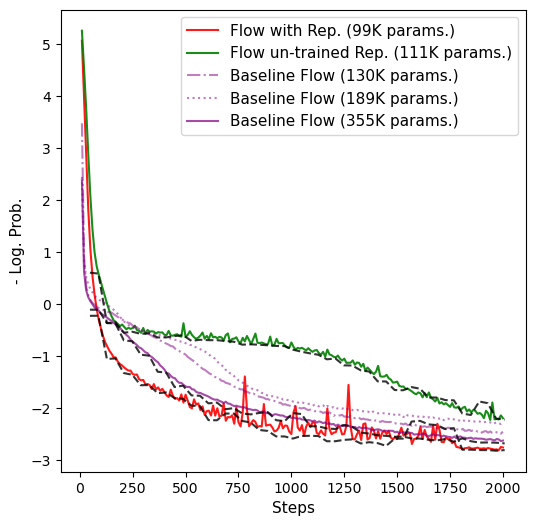

In [4]:
plt.figure(figsize=(6, 6))
plt.plot(step_vals, ea_trained_vals, label='Flow with Rep. (99K params.)', c='red', alpha=0.9)
plt.plot(step_vals, ea_untrained_vals, label='Flow un-trained Rep. (111K params.)', color='green', alpha=0.9)

plt.plot(step_vals, ea_baseline_20_vals, label='Baseline Flow (130K params.)', c='purple', linestyle='dashdot', alpha=0.5)
plt.plot(step_vals, ea_baseline_30_vals, label='Baseline Flow (189K params.)', c='purple', linestyle='dotted', alpha=0.5)
plt.plot(step_vals, ea_baseline_vals, label='Baseline Flow (355K params.)', c='purple', alpha=0.7)


plt.plot(step_vals_val, ea_untrained_vals_val, color='black', alpha=0.8, linestyle="dashed")
plt.plot(step_vals_val, ea_trained_vals_val, color='black', alpha=0.8, linestyle="dashed")
plt.plot(step_vals_val, ea_baseline_vals_val, color='black', alpha=0.8, linestyle="dashed")

plt.xlabel('Steps', fontsize=11)
plt.ylabel('- Log. Prob.', fontsize=11)
plt.legend(fontsize=11)
plt.savefig('sho-model-convergence.pdf')